In [2]:
rm(list=ls())
libraries = c("dplyr","magrittr","tidyr","reshape2","ggplot2","ggpubr","hrbrthemes","extrafont","openxlsx","readxl","RColorBrewer","zoo",
              "readxl","writexl","gridExtra","MASS","readr","stats","pracma","stringr","mixdist","corpcor","rstan","bayesplot")
for(x in libraries) { library(x,character.only=TRUE,warn.conflicts=FALSE,quietly=TRUE) }

theme_set(theme_bw())
setwd("../wane_ve_estimation_multivariant")

In [3]:
# https://doi.org/10.1093/cid/ciac290 supplementary-material (British Columbia) #delta
lower_ref <- c(94,94,92,92,92,92,90,90,90,90,88,88,88,88,81,81,81,81,73,73,73,73,80,80,80,80,rep(75,19))
median_ref <- c(95,95,93,93,93,93,91,91,91,91,89,89,89,89,85,85,85,85,80,80,80,80,83,83,83,83,rep(79,19))
upper_ref <- c(95,95,93,93,93,93,91,91,91,91,90,90,90,90,88,88,88,88,86,86,86,86,86,86,86,86,rep(83,19))

In [4]:
# https://doi.org/10.1093/cid/ciac290 supplementary-material (Quebec) #delta
lower_ref1 <- c(91,91,91,91,91,91,90,90,90,90,88,88,88,88,85,85,85,85,87,87,87,87,90,90,90,90,rep(65,19))
median_ref1 <- c(92,92,92,92,92,92,90,90,90,90,88,88,88,88,86,86,86,86,89,89,89,89,92,92,92,92,rep(79,19))
upper_ref1 <- c(93,93,93,93,93,93,91,91,91,91,89,89,89,89,87,87,87,87,90,90,90,90,94,94,94,94,rep(88,19))

In [5]:
# https://www.niid.go.jp/niid/ja/2019-ncov/2484-idsc/10966-covid19-71.html #omicron
lower_ref_om <- c(rep(36,8),rep(29,8),rep(25,8),rep(16,21))
median_ref_om <- c(rep(71,8),rep(54,8),rep(49,8),rep(53,21))
upper_ref_om <- c(rep(87,8),rep(70,8),rep(65,8),rep(74,21))

In [6]:
ncov_vax <- read_csv("data/japan_vaccine_week.csv") 
ncov_vax$week <- as.Date(ncov_vax$week)
ncov_vax%>%head(5);ncov_vax%>%tail(5)

Parsed with column specification:
cols(
  week = col_character(),
  cumulative = col_double(),
  vaccine = col_double()
)



week,cumulative,vaccine
<date>,<dbl>,<dbl>
2021-05-04,0.0005,0.0005
2021-05-11,0.0030,0.0025
2021-05-18,0.0054,0.0024
2021-05-25,0.0081,0.0027
2021-06-01,0.0164,0.0083


week,cumulative,vaccine
<date>,<dbl>,<dbl>
2022-02-07,0.7452,7e-04
2022-02-14,0.7459,7e-04
2022-02-21,0.7467,8e-04
2022-02-28,0.7472,5e-04
2022-03-07,0.7478,6e-04


In [7]:
ncovdata <- read_csv("data/japan_breakthrough_week.csv") 
ncovdata$week <- as.Date(ncovdata$week)
ncovdata%>%head(5);

Parsed with column specification:
cols(
  week = col_character(),
  unvax_case = col_double(),
  vax_case = col_double(),
  unknown = col_double()
)



week,unvax_case,vax_case,unknown
<date>,<dbl>,<dbl>,<dbl>
2021-09-27,7488,1228,617
2021-10-04,4465,952,361
2021-10-11,2573,745,227
2021-10-18,1526,556,117
2021-11-01,952,425,86


In [8]:
voc <- read_csv("data/VOC_japan.csv") 
voc$week <- as.Date(voc$week)
voc %>% head(5)
Others <- voc %>% filter(Variant == "Others")
Alpha <- voc %>% filter(Variant == "Alpha")
Delta <- voc %>% filter(Variant == "Delta")
Omicron <- voc %>% filter(Variant == "Omicron")

Parsed with column specification:
cols(
  week = col_character(),
  Proportion = col_double(),
  Variant = col_character()
)



week,Proportion,Variant
<date>,<dbl>,<chr>
2021-05-04,0.11644401,Others
2021-05-11,0.10862315,Others
2021-05-18,0.07994664,Others
2021-05-25,0.08081562,Others
2021-06-01,0.08255359,Others


In [9]:
nrow(ncov_vax)-nrow(ncovdata)

[1] 22

In [31]:
ncovdata_plot <- read_csv("data/japan_breakthrough_week_plot.csv") 
ncovdata_plot$week <- as.Date(ncovdata_plot$week)
options(repr.plot.width=15,repr.plot.height=8)
options(scipen=1000000)
ncovdata_plot %>% ggplot() +
  geom_bar(aes(x=week,y=Case, fill=Type), stat = "identity") +
  scale_x_date(date_labels = "%y/%m/%d", date_breaks = "7 day", expand = c(0,0)) +
  scale_y_continuous(breaks=seq(0,550000,100000),limit=c(0,550000), expand = c(0, 0)) +
  labs(x="Week", y="Incidence") +
  ggtitle("The numer of COVID-19 cases with vaccination status in Japan") + scale_fill_brewer(palette = "Paired") +
  theme_bw() + theme(axis.text.x = element_text(size=15, angle = 90, hjust = 1),axis.text.y = element_text(size=15)) +
    theme(text = element_text(size=20, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank()) -> ncovdata_plot

Parsed with column specification:
cols(
  week = col_character(),
  Type = col_character(),
  Case = col_double()
)



In [32]:
options(repr.plot.width=15,repr.plot.height=8)
voc %>% ggplot() +
  geom_bar(aes(x=week,y=Proportion, fill=Variant), stat = "identity") +
  scale_x_date(date_labels = "%y/%m/%d", date_breaks = "7 day", expand = c(0,0)) +
  scale_y_continuous(expand = c(0,0))+
  labs(x="Week", y="Proportion") +
  ggtitle("Proportion of SARS-CoV-2 variants in Japan") +
  theme_bw() + theme(axis.text.x = element_text(size=15, angle = 90, hjust = 1),axis.text.y = element_text(size=15)) + scale_fill_brewer(palette = "Paired") + 
    theme(text = element_text(size=20, family="sans",color="black"),
          axis.text = element_text(size=10, family="sans",color="black"),
          panel.grid.major = element_blank(), panel.grid.minor = element_blank()) -> voc_plot

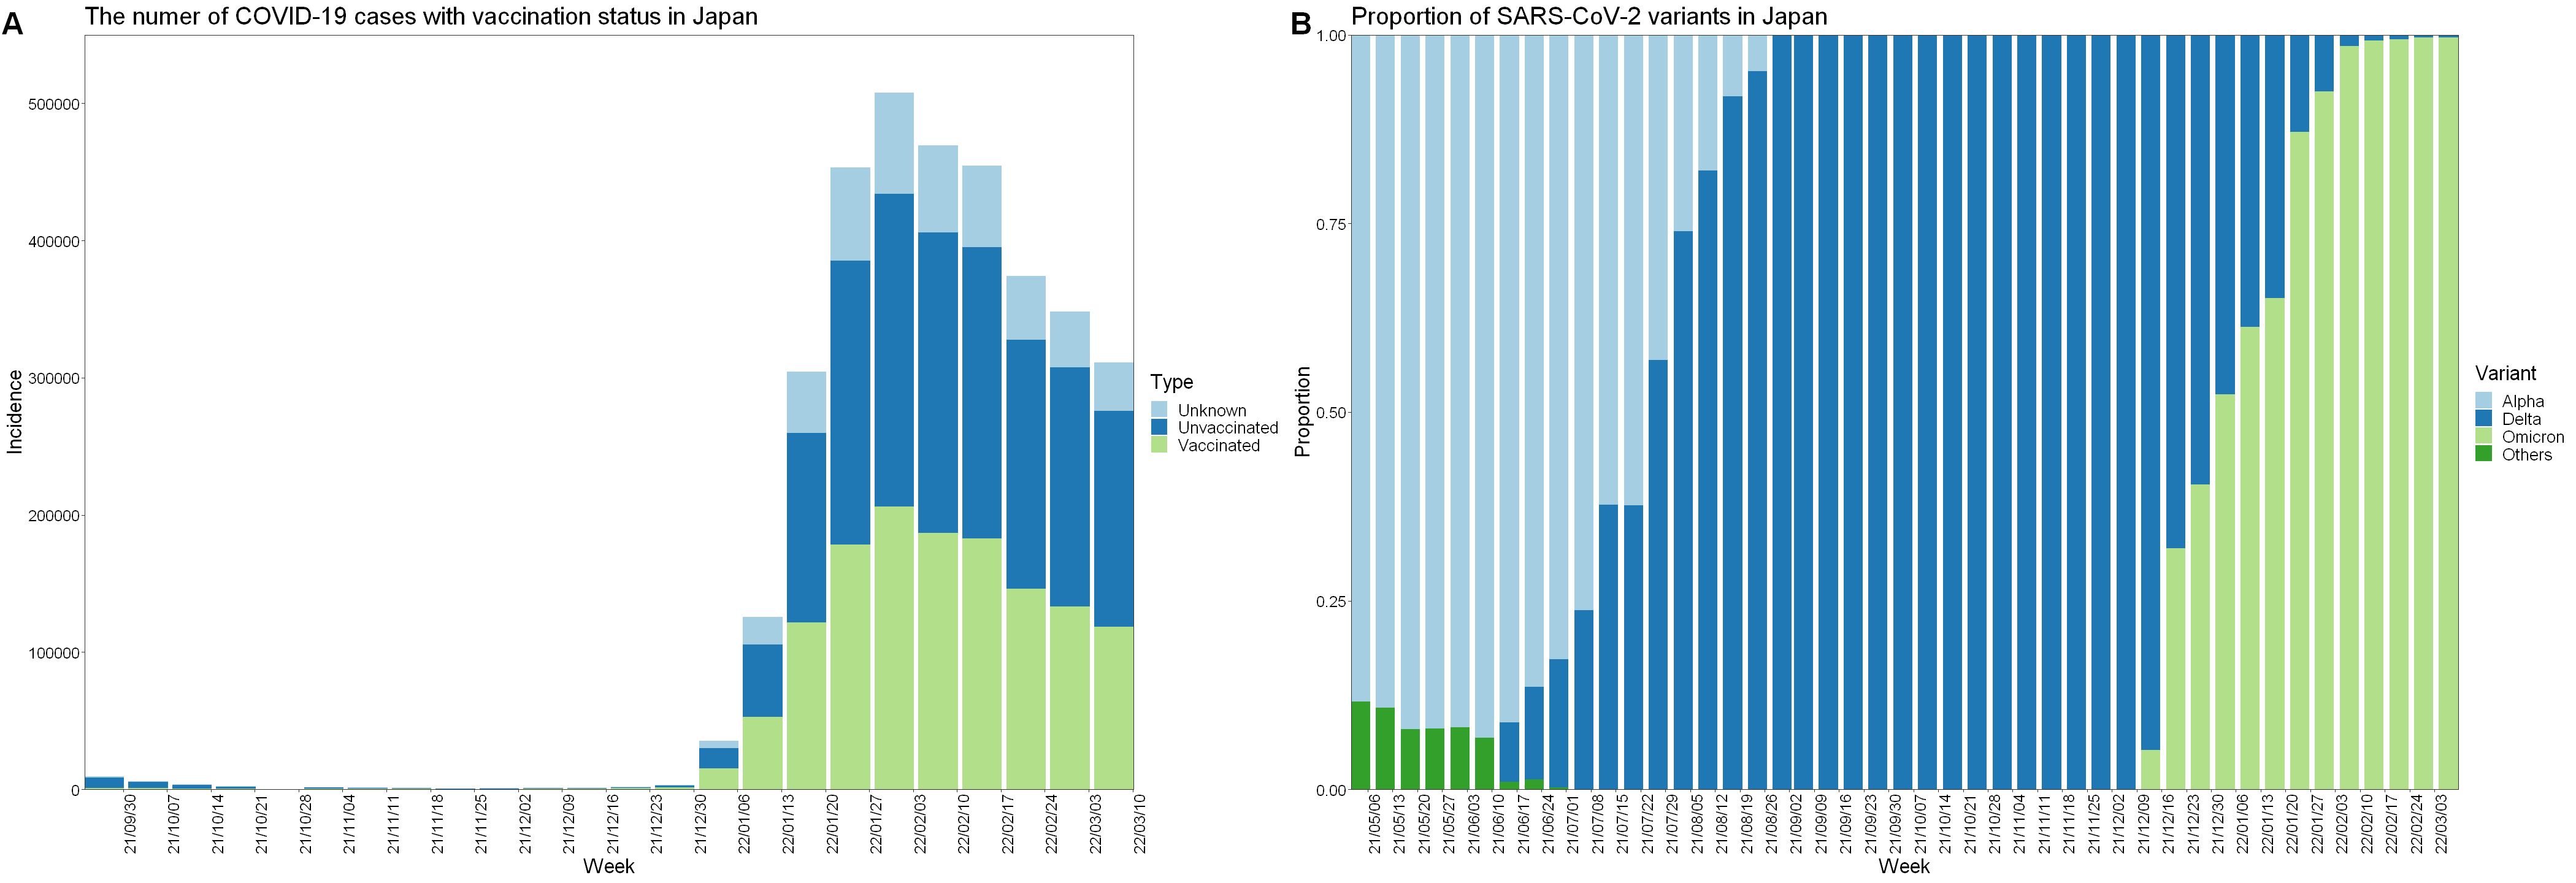

In [33]:
options(repr.plot.width=35,repr.plot.height=12)
ggarrange(ncovdata_plot,voc_plot, nrow=1,ncol=2,font.label=list(size=30),hjust=-0.1,labels=c("A","B"))

ggsave(file = "output/data_plot_jp.png", width = 35, height = 12)

### stan code (exp)

In [10]:
source("src/stan/Model_Japan_param_1.stan") # load functions
#options(jupyter.plot_mimetypes = "image/svg+xml")

In [11]:
## modify data into a form suitable for Stan
delay= nrow(ncov_vax)-nrow(ncovdata)
l=2 # adjustment for left censoring
m=0 # control the end of observation period 
T = nrow(ncovdata)-l-m # number of days
N = 125708382
num_data = T+l+delay
it = ncovdata$unvax_case[1:(T+l)] + ncovdata$unknown[1:(T+l)] * (ncovdata$unvax_case[1:(T+l)]/(ncovdata$unvax_case[1:(T+l)]+ncovdata$vax_case[1:(T+l)])) 
jt = ncovdata$vax_case[1:(T+l)] + ncovdata$unknown[1:(T+l)] * (ncovdata$vax_case[1:(T+l)]/(ncovdata$unvax_case[1:(T+l)]+ncovdata$vax_case[1:(T+l)])) 
others= Others$Proportion[1:(T+l+delay)]
alpha = Alpha$Proportion[1:(T+l+delay)]
delta = Delta$Proportion[1:(T+l+delay)]
omicron = Omicron$Proportion[1:(T+l+delay)]
vaccine= ncov_vax$vaccine[1:(T+l+delay)]
odds = ncov_vax$cumulative[1:(T+l+delay)]/(1-ncov_vax$cumulative[1:(T+l+delay)])
si = plnorm(seq(7, (T+l)*7, by = 7), log(4.699), log(2.936))-plnorm(seq(0, (T+l)*7-7, by = 7), log(4.699), log(2.936)) #serial interval (Nishiura et al. 2020)

data = list(T=T, N=N, it=it, jt=jt, Gamma=vaccine, SI=si, odds=odds, others=others, alpha=alpha, delta=delta, omicron=omicron, delay=delay, l=l, num_data=num_data)
# specify parameters to monitor
parameters = c("ve_d","ve_om","zeta","eta","Rit","Rjt","k","c","ii","jj") #others and alpha are nuisance parameters for this japan data
# eps: overall effect over time, ve: direct effect over time

nuts_fit1 = stan(model_code=Model_1,data=data,pars=parameters,iter=5000,thin=10,warmup=1000,chain=2)
#nuts_fit1 = stan(model_code=Model_2,data=data,pars=parameters,iter=5000,thin=10,warmup=1000,chain=2)


SAMPLING FOR MODEL '933089bf77ca748819778459dcf9c1a6' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.004 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 40 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1001 / 5000 [ 20%]  (Sampling)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Sampling)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 247.82 seconds (Warm-up)
Chain 1:                218.516 seconds (Sampling)
C

In [35]:
nuts_fit1

Inference for Stan model: 933089bf77ca748819778459dcf9c1a6.
2 chains, each with iter=5000; warmup=1000; thin=10; 
post-warmup draws per chain=400, total post-warmup draws=800.

               mean se_mean     sd      2.5%       25%       50%       75%
ve_d[1]        0.95    0.00   0.03      0.87      0.93      0.95      0.97
ve_d[2]        0.94    0.00   0.03      0.87      0.93      0.95      0.97
ve_d[3]        0.94    0.00   0.03      0.87      0.92      0.95      0.96
ve_d[4]        0.94    0.00   0.03      0.86      0.92      0.94      0.96
ve_d[5]        0.94    0.00   0.03      0.86      0.92      0.94      0.96
ve_d[6]        0.94    0.00   0.03      0.86      0.92      0.94      0.96
ve_d[7]        0.93    0.00   0.03      0.86      0.92      0.94      0.96
ve_d[8]        0.93    0.00   0.03      0.86      0.91      0.93      0.95
ve_d[9]        0.93    0.00   0.03      0.85      0.91      0.93      0.95
ve_d[10]       0.93    0.00   0.03      0.85      0.91      0.93      0.9

In [17]:
source("src/plot/Result_arrangement.R") # load functions
#options(jupyter.plot_mimetypes = "image/svg+xml")

In [34]:
source("src/plot/Plot_Japan.R") # load functions
#options(jupyter.plot_mimetypes = "image/svg+xml")

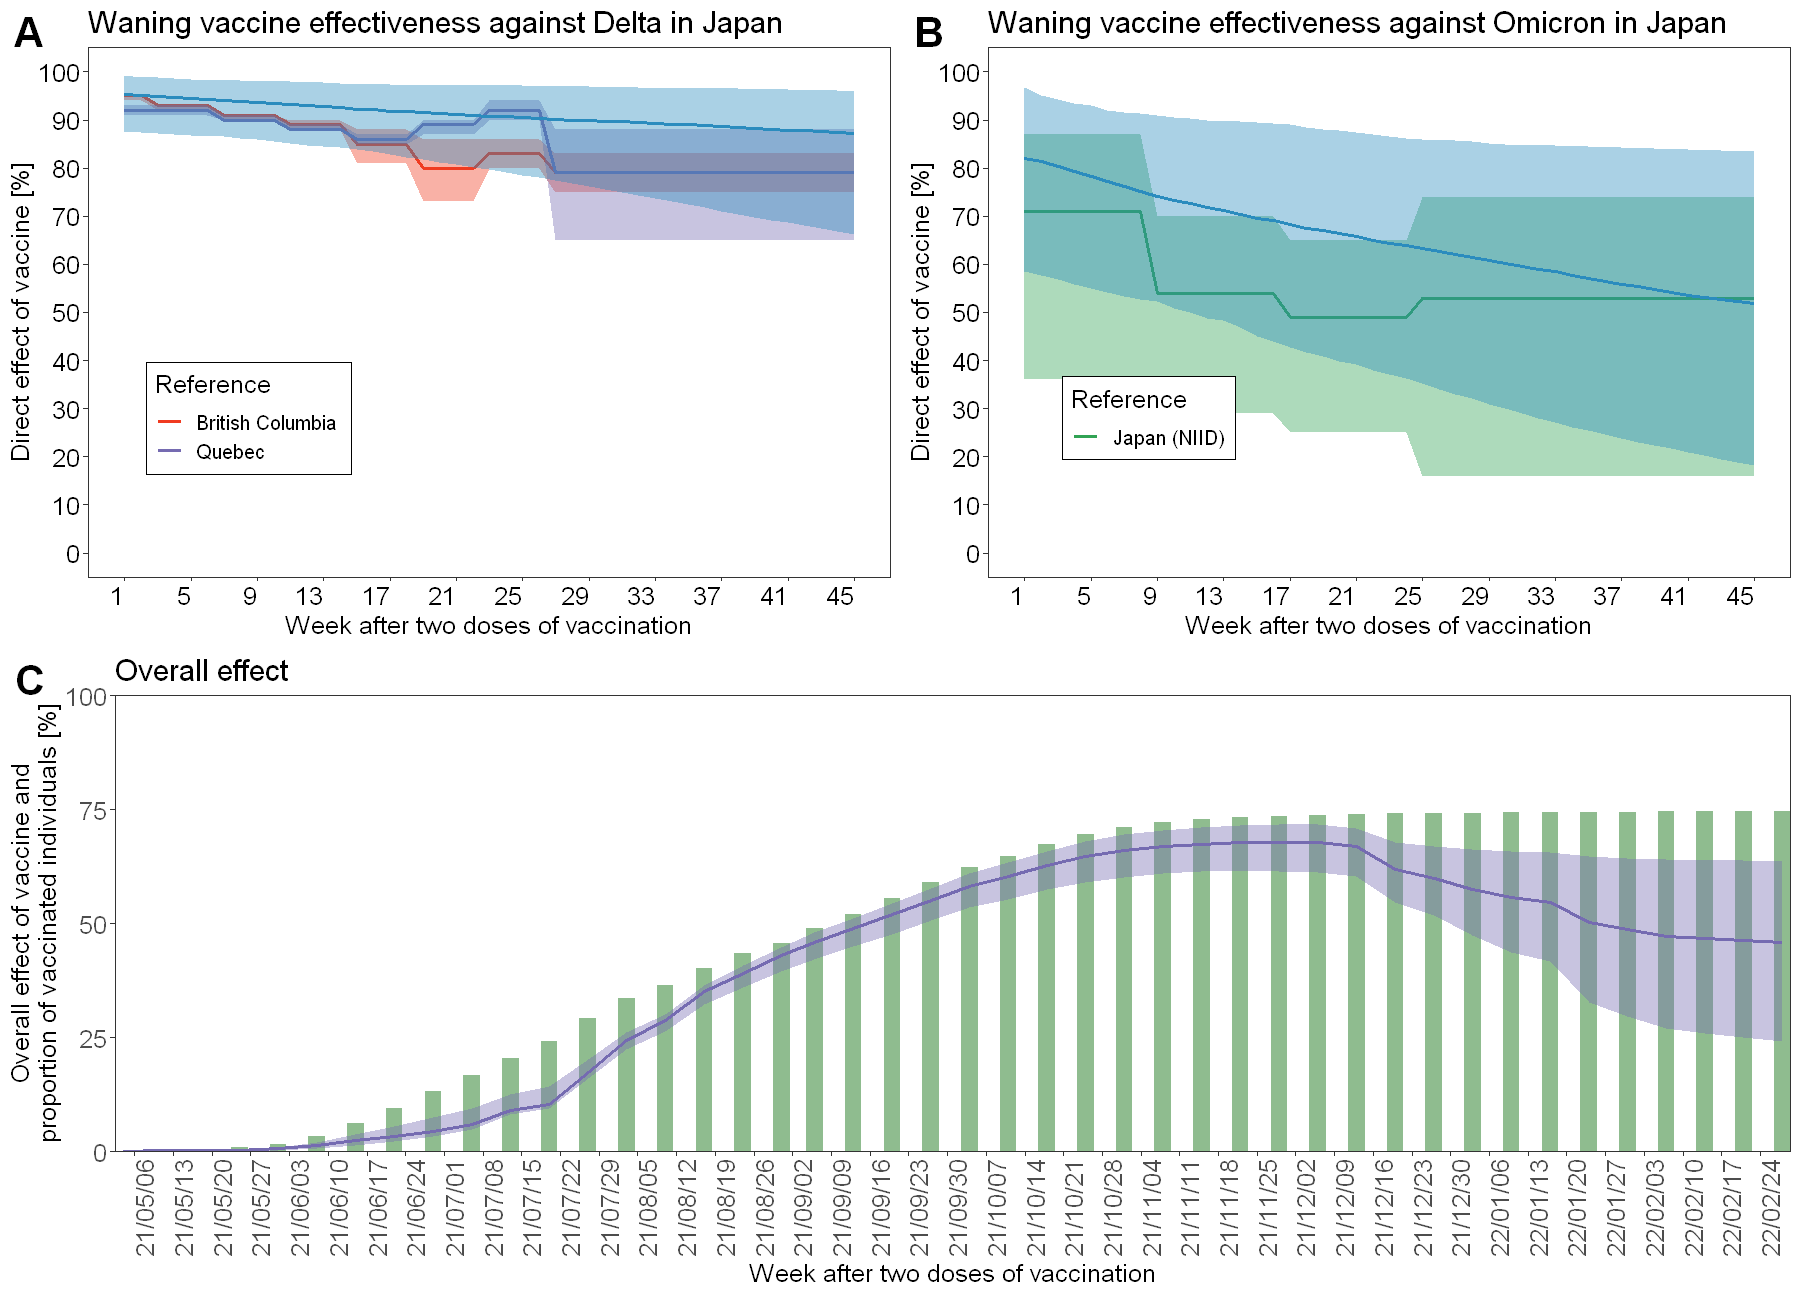

In [36]:
options(repr.plot.width=15,repr.plot.height=10.8)
direct_effect <- ggarrange(delta_plot,omicron_plot, nrow=1,ncol=2,labels=c("A","B"),font.label=list(size=25),common.legend=FALSE)
ggarrange(direct_effect,overall_plot, nrow=2,ncol=1,font.label=list(size=25),labels=c("","C"),common.legend=FALSE)

ggsave(file = "output/VE_waning_plot_param1_Japan.png", width = 15, height = 10.8)

### Check fitness

In [39]:
source("src/plot/Fitcheck.R")

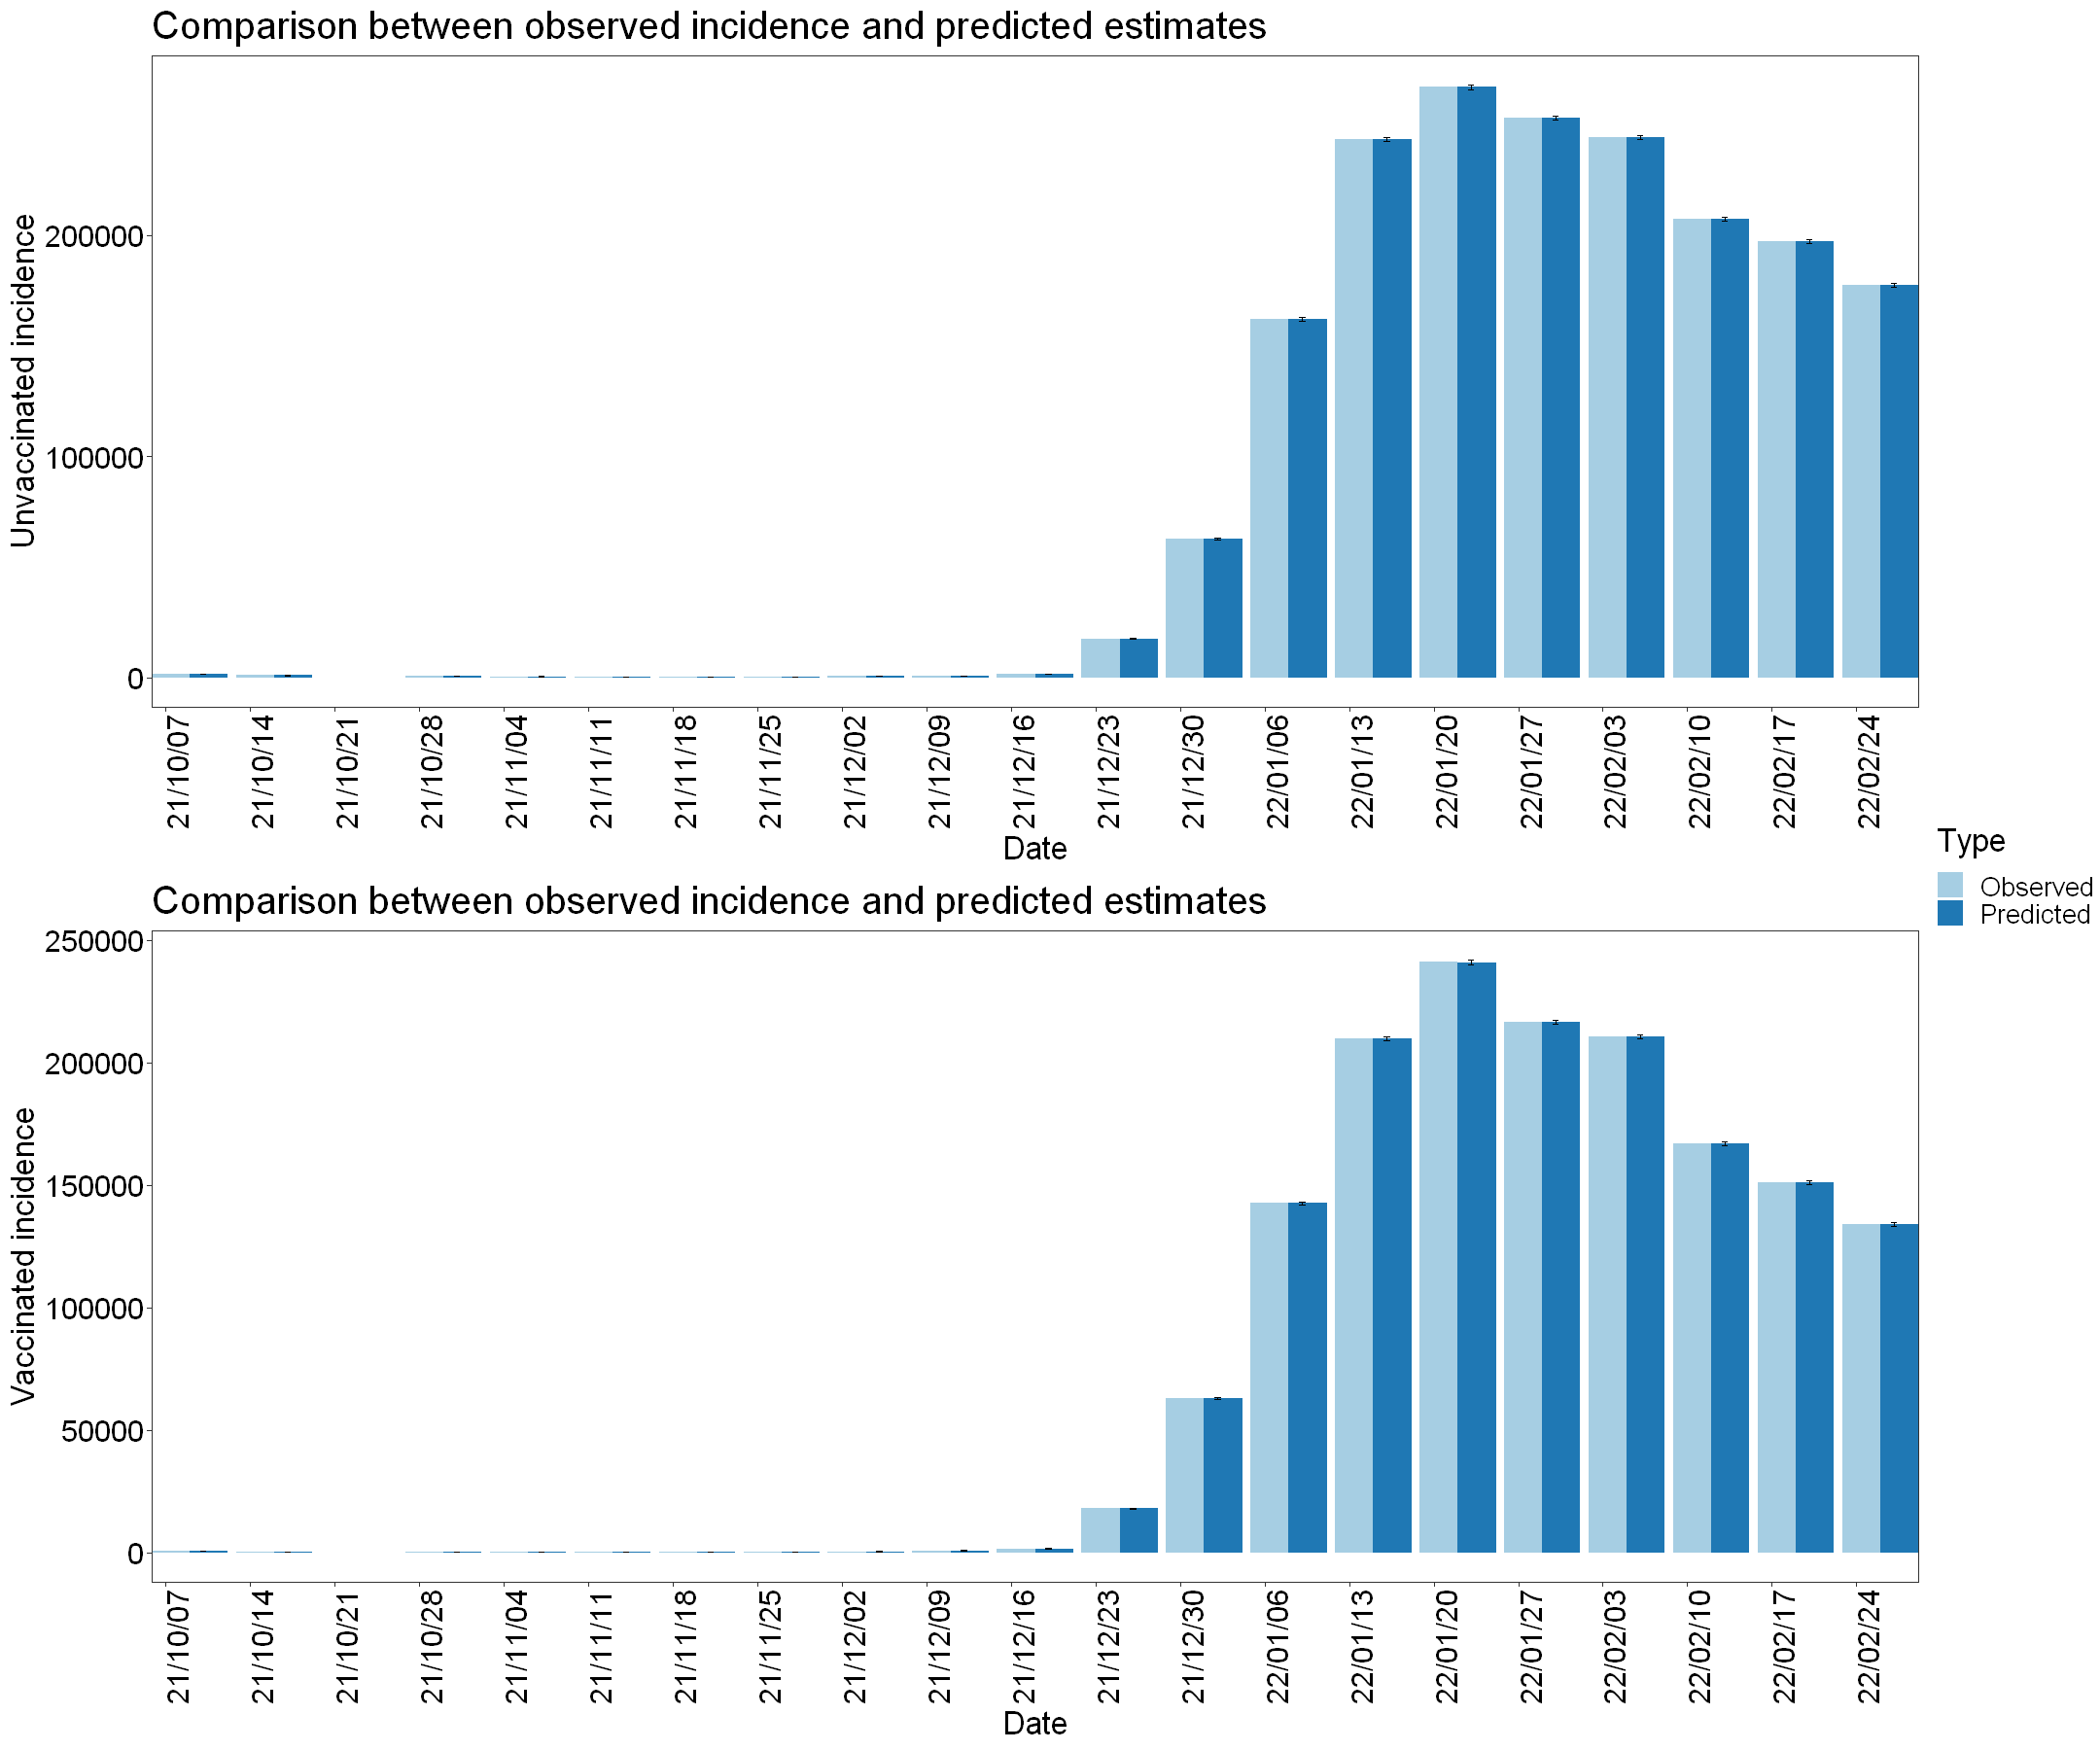

In [40]:
options(repr.plot.width=18,repr.plot.height=15)
ggarrange(u_param_plot,v_param_plot, nrow=2,ncol=1,common.legend=TRUE,legend="right")
ggsave(file = "output/fitness_plot_param1_Japan.png", width = 18, height = 15)

## Stan code (inv logit)

In [37]:
source("src/stan/Model_Japan_param_2.stan")

In [38]:
## modify data into a form suitable for Stan
delay= nrow(ncov_vax)-nrow(ncovdata)
l=2 # adjustment for left censoring
m=0 # control the end of observation period 
T = nrow(ncovdata)-l-m # number of days
N = 125708382
num_data = T+l+delay
it = ncovdata$unvax_case[1:(T+l)] + ncovdata$unknown[1:(T+l)] * (ncovdata$unvax_case[1:(T+l)]/(ncovdata$unvax_case[1:(T+l)]+ncovdata$vax_case[1:(T+l)])) 
jt = ncovdata$vax_case[1:(T+l)] + ncovdata$unknown[1:(T+l)] * (ncovdata$vax_case[1:(T+l)]/(ncovdata$unvax_case[1:(T+l)]+ncovdata$vax_case[1:(T+l)])) 
others= Others$Proportion[1:(T+l+delay)]
alpha = Alpha$Proportion[1:(T+l+delay)]
delta = Delta$Proportion[1:(T+l+delay)]
omicron = Omicron$Proportion[1:(T+l+delay)]
vaccine= ncov_vax$vaccine[1:(T+l+delay)]
odds = ncov_vax$cumulative[1:(T+l+delay)]/(1-ncov_vax$cumulative[1:(T+l+delay)])
si = plnorm(seq(7, (T+l)*7, by = 7), log(4.699), log(2.936))-plnorm(seq(0, (T+l)*7-7, by = 7), log(4.699), log(2.936)) #serial interval (Nishiura et al. 2020)

data = list(T=T, N=N, it=it, jt=jt, Gamma=vaccine, SI=si, odds=odds, others=others, alpha=alpha, delta=delta, omicron=omicron, delay=delay, l=l, num_data=num_data)
# specify parameters to monitor
parameters = c("ve_d","ve_om","zeta","eta","Rit","Rjt","k","p","ii","jj") #others and alpha are nuisance parameters for this japan data
# eps: overall effect over time, ve: direct effect over time

nuts_fit1 = stan(model_code=Model_2,data=data,pars=parameters,iter=5000,thin=10,warmup=1000,chain=2)


SAMPLING FOR MODEL '7d8d3c7c8956245e4821207ee7d41d64' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.002 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 20 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 5000 [  0%]  (Warmup)
Chain 1: Iteration:  500 / 5000 [ 10%]  (Warmup)
Chain 1: Iteration: 1000 / 5000 [ 20%]  (Warmup)
Chain 1: Iteration: 1001 / 5000 [ 20%]  (Sampling)
Chain 1: Iteration: 1500 / 5000 [ 30%]  (Sampling)
Chain 1: Iteration: 2000 / 5000 [ 40%]  (Sampling)
Chain 1: Iteration: 2500 / 5000 [ 50%]  (Sampling)
Chain 1: Iteration: 3000 / 5000 [ 60%]  (Sampling)
Chain 1: Iteration: 3500 / 5000 [ 70%]  (Sampling)
Chain 1: Iteration: 4000 / 5000 [ 80%]  (Sampling)
Chain 1: Iteration: 4500 / 5000 [ 90%]  (Sampling)
Chain 1: Iteration: 5000 / 5000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 104.105 seconds (Warm-up)
Chain 1:                102.957 seconds (Sampling)


In [43]:
nuts_fit1

Inference for Stan model: 7d8d3c7c8956245e4821207ee7d41d64.
2 chains, each with iter=5000; warmup=1000; thin=10; 
post-warmup draws per chain=400, total post-warmup draws=800.

               mean se_mean     sd      2.5%       25%       50%       75%
ve_d[1]        0.97    0.00   0.03      0.90      0.95      0.97      0.99
ve_d[2]        0.97    0.00   0.03      0.90      0.95      0.97      0.99
ve_d[3]        0.96    0.00   0.03      0.90      0.95      0.97      0.98
ve_d[4]        0.96    0.00   0.03      0.89      0.95      0.97      0.98
ve_d[5]        0.96    0.00   0.03      0.89      0.94      0.96      0.98
ve_d[6]        0.95    0.00   0.03      0.89      0.94      0.96      0.98
ve_d[7]        0.95    0.00   0.03      0.89      0.94      0.96      0.97
ve_d[8]        0.95    0.00   0.03      0.88      0.93      0.95      0.97
ve_d[9]        0.95    0.00   0.03      0.88      0.93      0.95      0.97
ve_d[10]       0.94    0.00   0.03      0.87      0.93      0.95      0.9

In [44]:
source("src/plot/Result_arrangement.R") # load functions
#options(jupyter.plot_mimetypes = "image/svg+xml")

In [45]:
source("src/plot/Plot_Japan.R") # load functions
#options(jupyter.plot_mimetypes = "image/svg+xml")

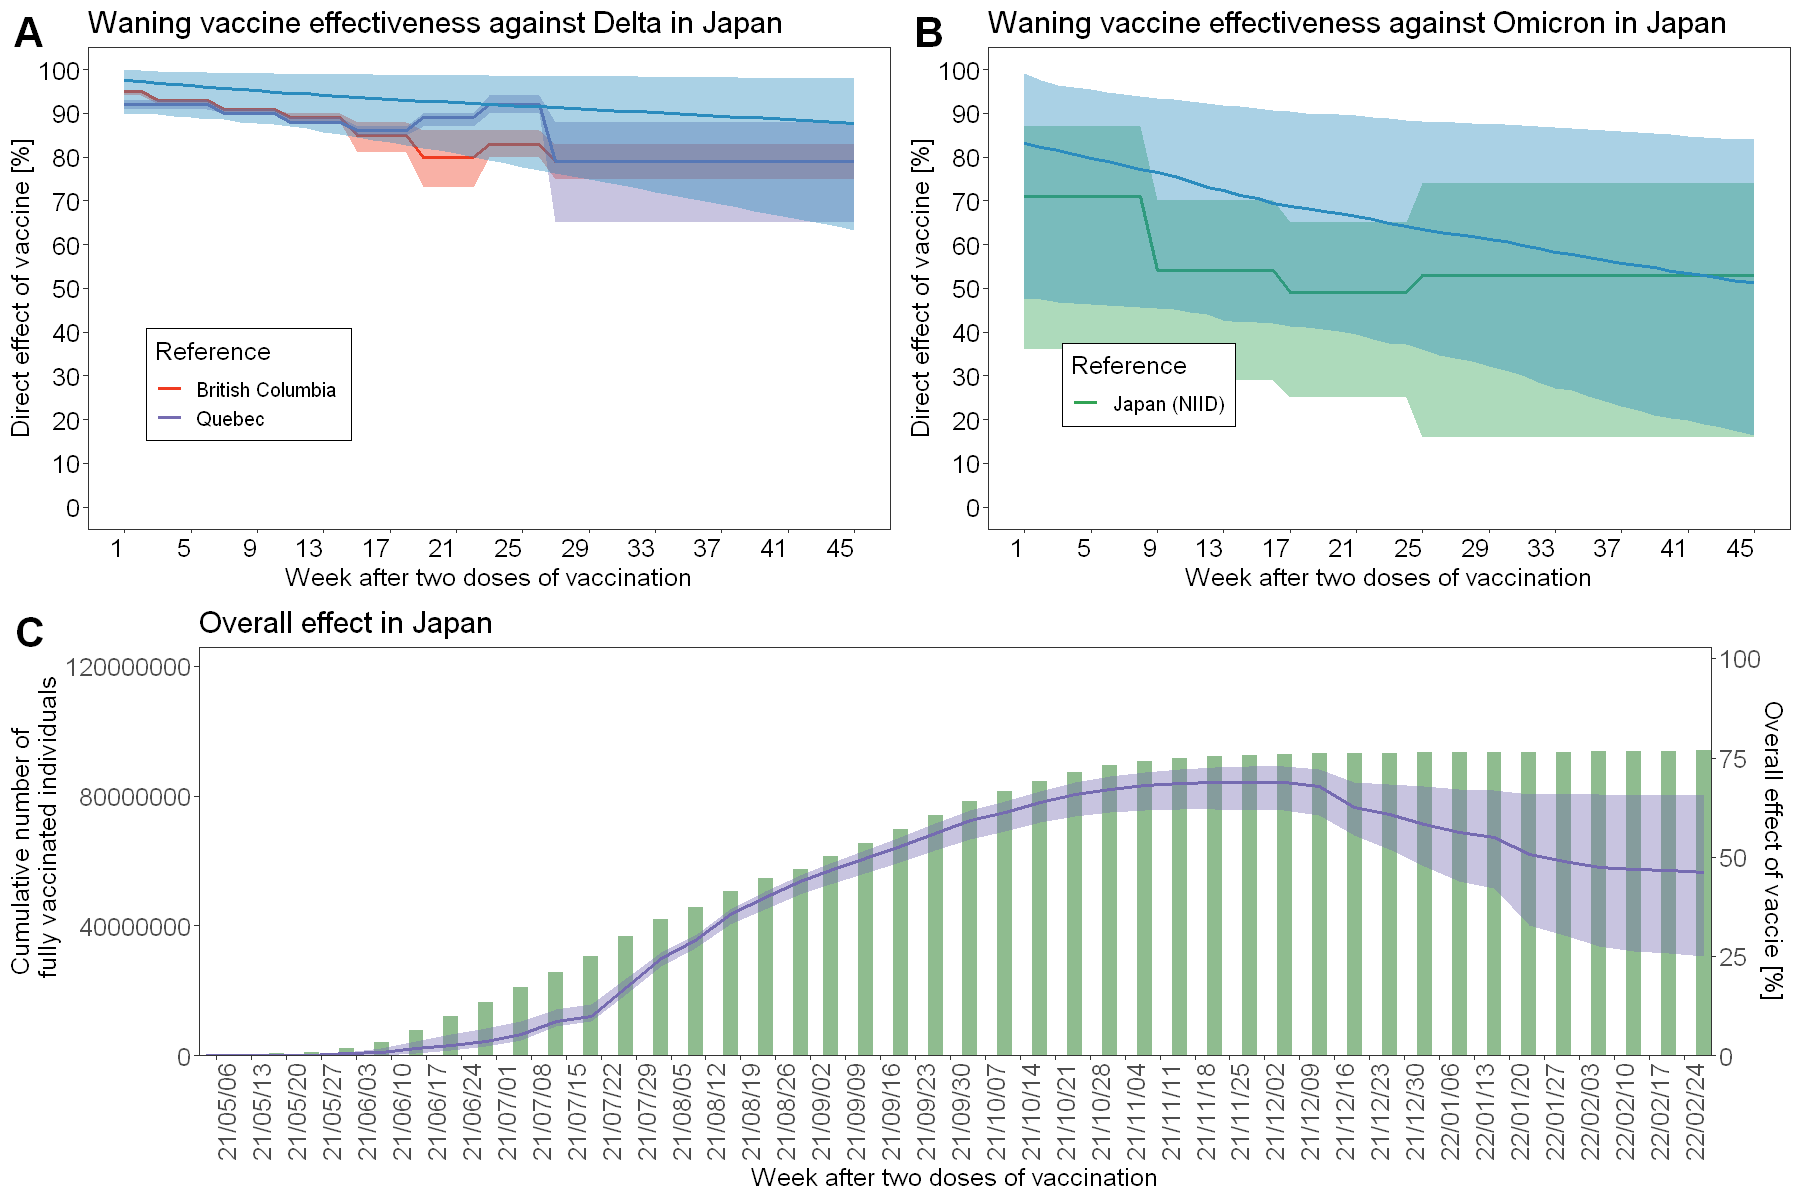

In [46]:
options(repr.plot.width=15,repr.plot.height=10)
direct_effect <- ggarrange(delta_plot,omicron_plot, nrow=1,ncol=2,labels=c("A","B"),font.label=list(size=25),common.legend=FALSE)
ggarrange(direct_effect,overall_plot, nrow=2,ncol=1,font.label=list(size=25),labels=c("","C"),common.legend=FALSE)

ggsave(file = "output/VE_waning_plot_param2_Japan.png", width = 15, height = 10)

### Ckeck fitness

In [47]:
source("src/plot/Fitcheck.R")

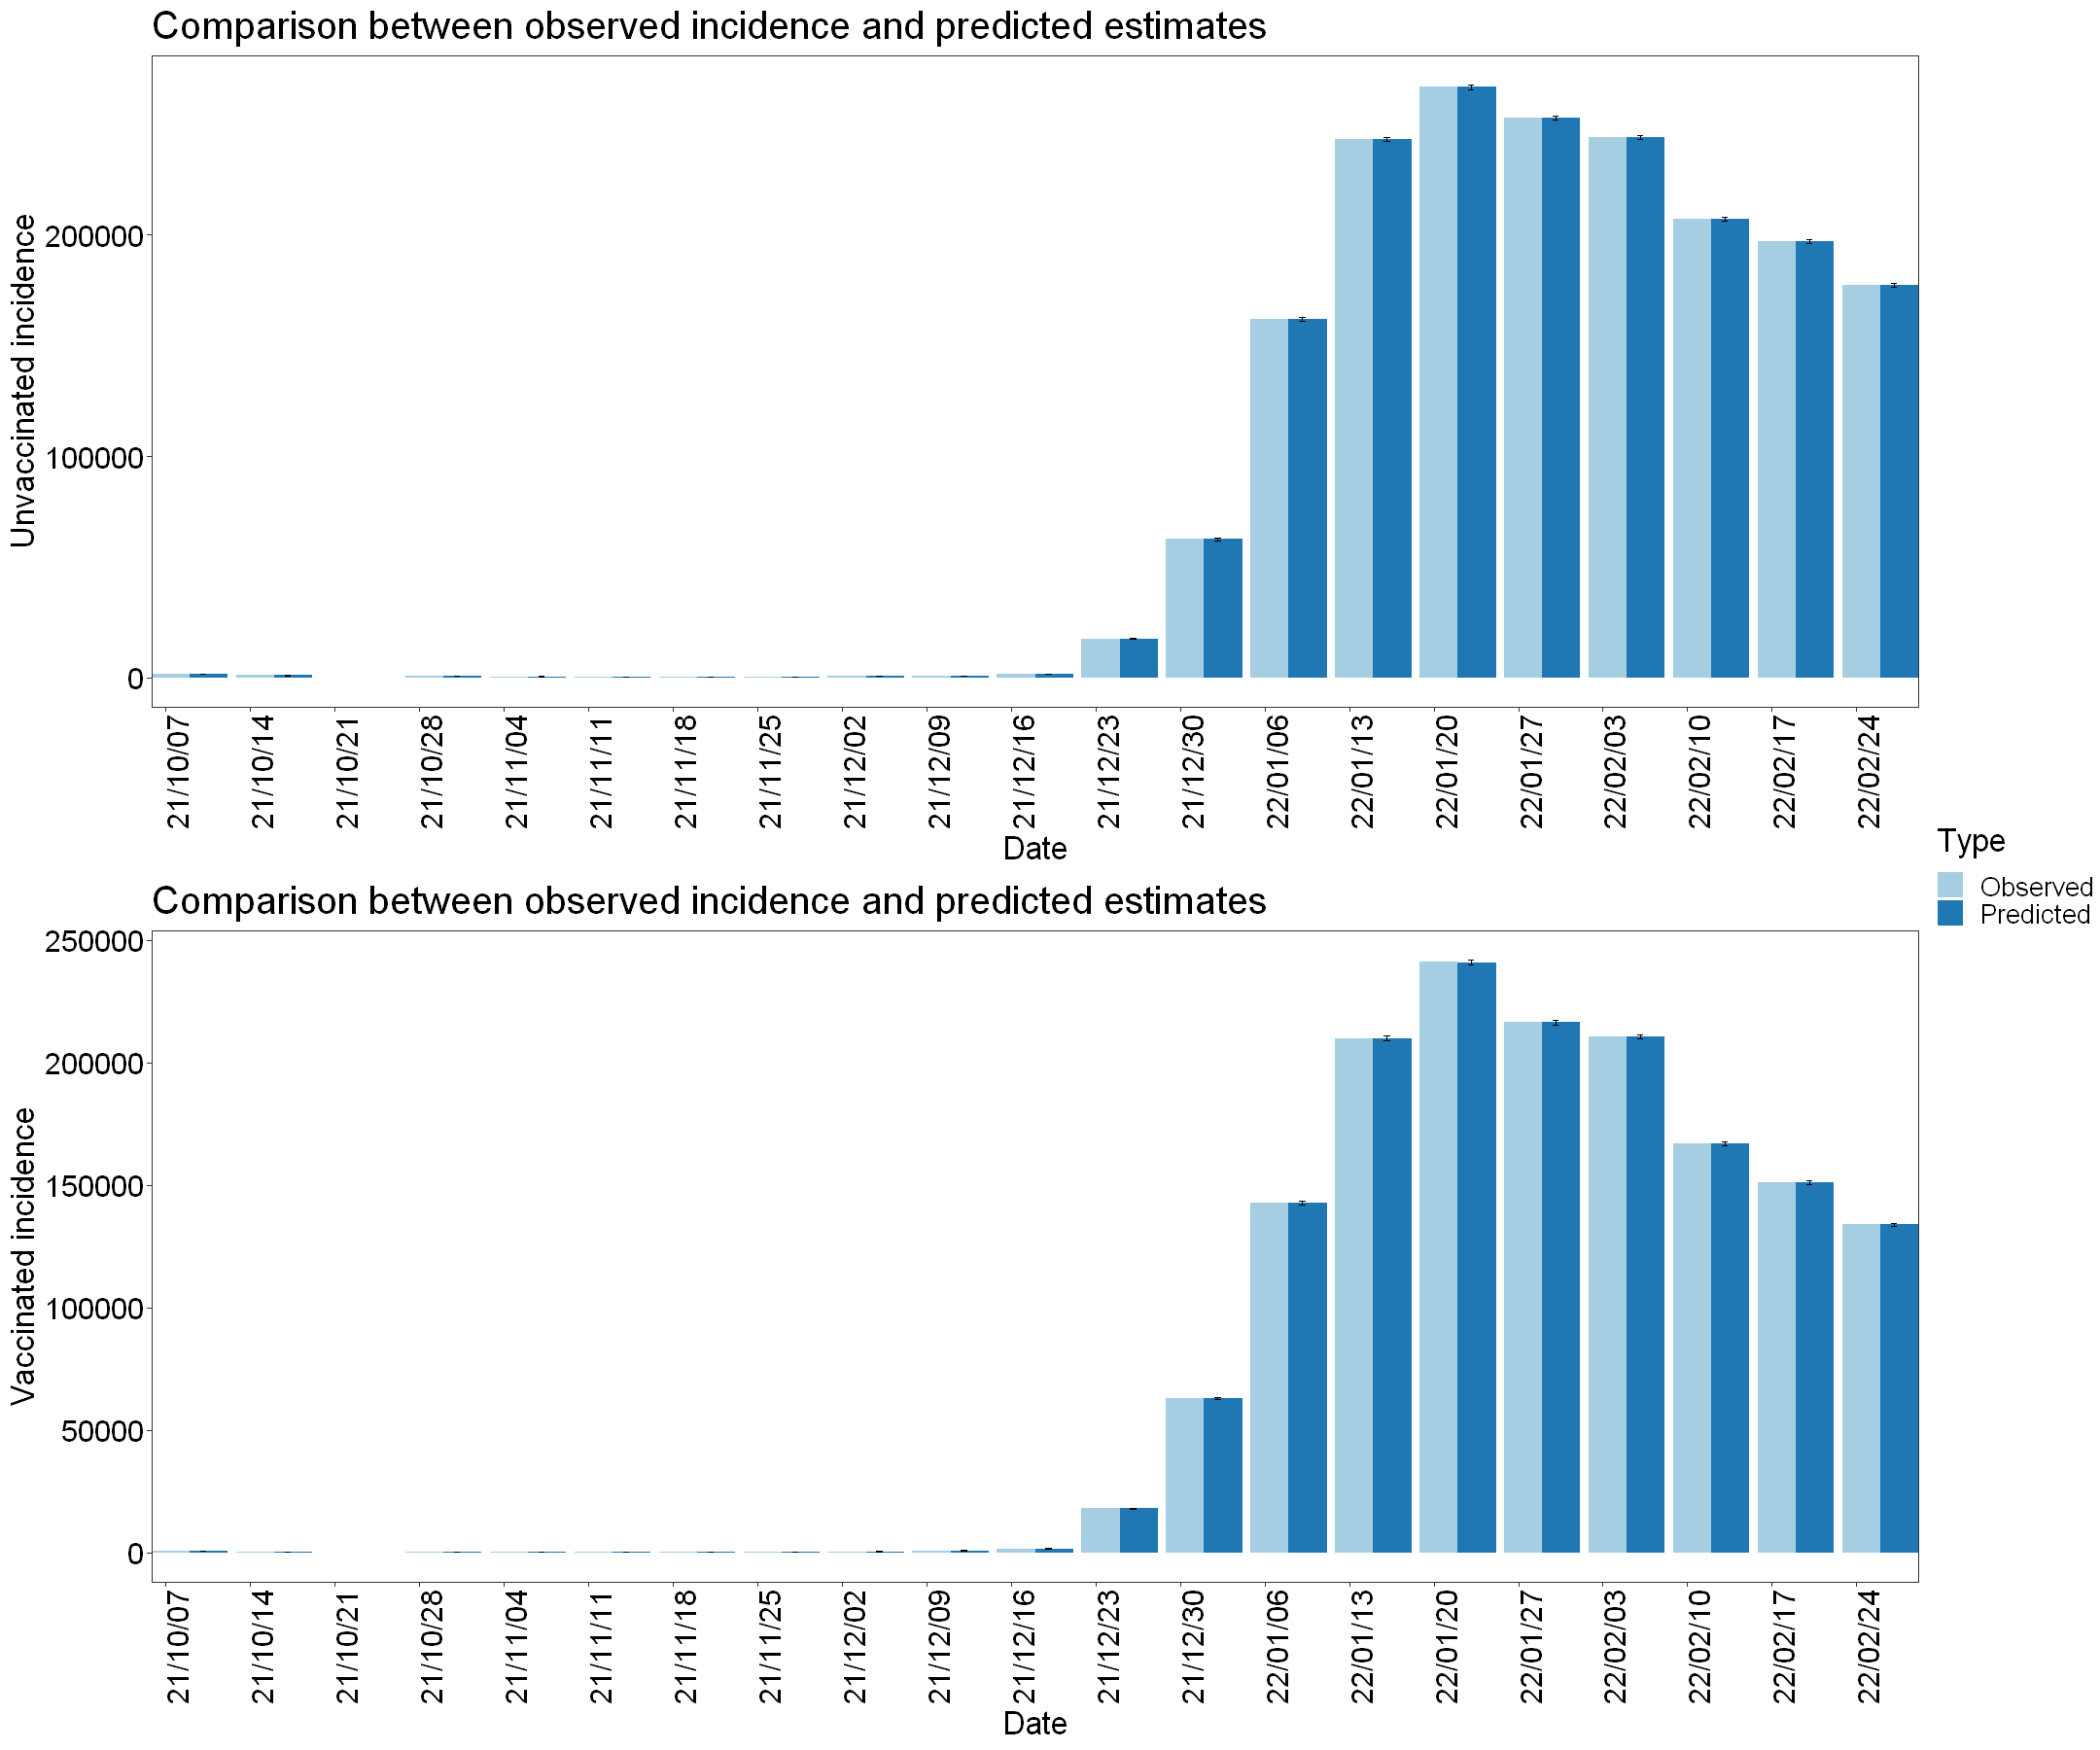

In [48]:
options(repr.plot.width=18,repr.plot.height=15)
ggarrange(u_param_plot,v_param_plot, nrow=2,ncol=1,common.legend=TRUE,legend="right")
ggsave(file = "output/fitness_plot_param2_Japan.png", width = 18, height = 15)